In [1]:
!pip install opendatasets

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: punsath
Your Kaggle Key: ··········


100%|██████████| 20.3k/20.3k [00:00<00:00, 26.7MB/s]

In [6]:
data = pd.read_csv("male-female-height-and-weight/Test set.csv")

In [7]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [8]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [9]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [10]:
X = data.drop(['Sex'], axis=1)
y = data['Sex']

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [58]:
X.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [59]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [60]:
y = y.astype("int")

In [61]:
y.dtype

dtype('int64')

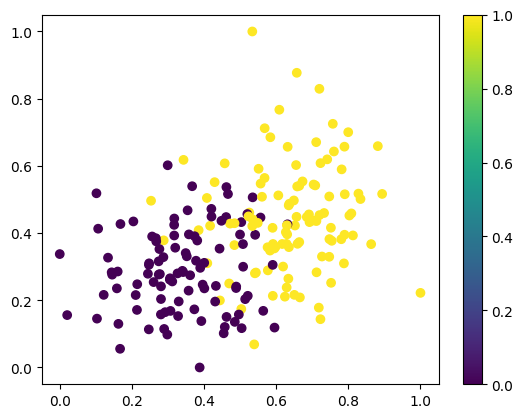

In [62]:
plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape

((164, 2), (41, 2))

In [66]:
data.shape

(205, 3)

Model Building

In [78]:
 # create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
             metrics = ["accuracy"])

# train the model
epoch_number = 20
history = model.fit(X_train, y_train, epochs=epoch_number)

Epoch 1/20
6/6 [==============================] - 2s 6ms/step - loss: 0.6998 - accuracy: 0.4756
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.5244
Epoch 3/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6362 - accuracy: 0.5305
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.5854
Epoch 5/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.7134
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5691 - accuracy: 0.6768
Epoch 7/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7317
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5003 - accuracy: 0.8293
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8354
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.8415
Epoch 11/20
6/6 [======================

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 66 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  164 non-null    float64
 1   Weight  164 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [80]:
y_train.dtype

dtype('int64')

In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                192       
                                                                 
 dense_19 (Dense)            (None, 16)                1040      
                                                                 
 dense_20 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1266 (4.95 KB)
Trainable params: 1266 (4.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Evaluate

In [71]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.3097 - accuracy: 0.8780


[0.3097297251224518, 0.8780487775802612]

In [82]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [83]:
y_pred[:5]

array([[0.933496  , 0.06650394],
       [0.06680176, 0.9331983 ],
       [0.02933707, 0.97066295],
       [0.85738015, 0.14261983],
       [0.11065362, 0.8893463 ]], dtype=float32)

In [86]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [87]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [88]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9047619>

In [89]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

<Axes: >

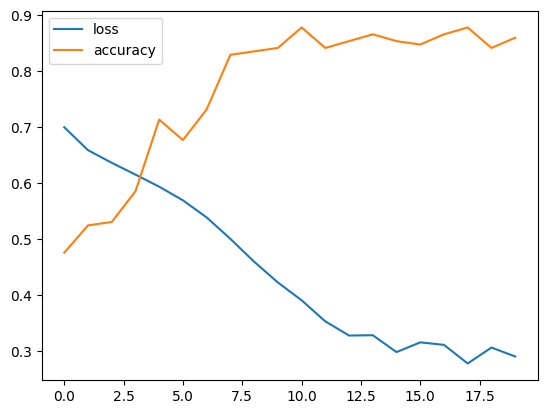

In [90]:
pd.DataFrame(history.history).plot()